# NLM Assignment 3
## Natalie Kim

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import math

### 1. Binary Logistic Regression Model
Your model will predict the likelihood of filing more than one claim in one unit of exposure.  Your goal is to train a model that has just the right set of predictors.

In [2]:
claims = pd.read_csv(r'/Users/xnxk040/Library/CloudStorage/OneDrive-W.WGrainger,inc/Desktop/linear-nonlinear data/claim_history.csv')

##### You will use MSTATUS, CAR_TYPE, REVOKED, and URBANICITY as the categorical predictors, and CAR_AGE, MVR_PTS, TIF, and TRAVTIME as the interval predictors.

In [3]:
cols = ["MSTATUS", "CAR_TYPE", "REVOKED", "URBANICITY", "CAR_AGE", "MVR_PTS", "TIF", "TRAVTIME", "CLM_COUNT", "EXPOSURE"]

claims = claims[cols]

In [4]:
claims.head()
#claims.describe()

,MSTATUS,CAR_TYPE,REVOKED,URBANICITY,CAR_AGE,MVR_PTS,TIF,TRAVTIME,CLM_COUNT,EXPOSURE
0,No,Minivan,No,Highly Urban/ Urban,18.0,3,11,14,0,0.189
1,No,Minivan,No,Highly Urban/ Urban,1.0,0,1,22,0,1.000
2,No,Van,No,Highly Urban/ Urban,10.0,2,1,26,0,1.000
3,Yes,SUV,No,Highly Urban/ Urban,10.0,3,4,5,0,0.828
4,Yes,Minivan,No,Highly Urban/ Urban,6.0,0,7,32,0,0.729


In [5]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MSTATUS     10302 non-null  object 
 1   CAR_TYPE    10302 non-null  object 
 2   REVOKED     10302 non-null  object 
 3   URBANICITY  10302 non-null  object 
 4   CAR_AGE     9662 non-null   float64
 5   MVR_PTS     10302 non-null  int64  
 6   TIF         10302 non-null  int64  
 7   TRAVTIME    10302 non-null  int64  
 8   CLM_COUNT   10302 non-null  int64  
 9   EXPOSURE    10302 non-null  float64
dtypes: float64(2), int64(4), object(4)
memory usage: 805.0+ KB


In [6]:
#convert binary variables to factor
cat_vars = ["MSTATUS", "CAR_TYPE", "REVOKED", "URBANICITY"]

for var in cat_vars:
    claims[var] = claims[var].astype('category')

print(claims.dtypes)

MSTATUS       category
CAR_TYPE      category
REVOKED       category
URBANICITY    category
CAR_AGE        float64
MVR_PTS          int64
TIF              int64
TRAVTIME         int64
CLM_COUNT        int64
EXPOSURE       float64
dtype: object


##### You will first calculate the Frequency variable by dividing the CLM_COUNT by EXPOSURE.

In [7]:
frequency = claims['CLM_COUNT']/claims['EXPOSURE']
# frequency.describe()

##### Create a binary target variable that determines if the Frequency is strictly greater than one (i.e., the Event).

In [8]:
event = (frequency > 1).astype(int)
claims['EVENT'] = event
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   MSTATUS     10302 non-null  category
 1   CAR_TYPE    10302 non-null  category
 2   REVOKED     10302 non-null  category
 3   URBANICITY  10302 non-null  category
 4   CAR_AGE     9662 non-null   float64 
 5   MVR_PTS     10302 non-null  int64   
 6   TIF         10302 non-null  int64   
 7   TRAVTIME    10302 non-null  int64   
 8   CLM_COUNT   10302 non-null  int64   
 9   EXPOSURE    10302 non-null  float64 
 10  EVENT       10302 non-null  int64   
dtypes: category(4), float64(2), int64(5)
memory usage: 604.3 KB


##### Drop all missing values (i.e., NaN) of all the predictors and the target variable before training your model.

In [9]:
claims = claims.dropna()

#### A. Before you train the model, explore the predictors
For each predictor, generate a line chart that shows the odds of the Event by the predictor’s unique values.  The predictor’s unique values are displayed in ascending lexical order.

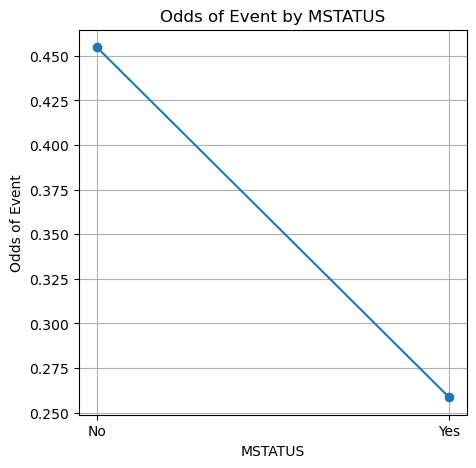

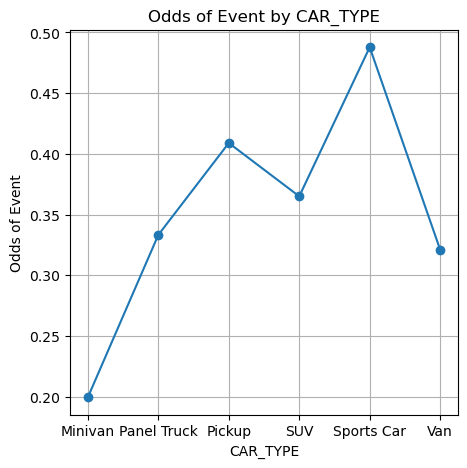

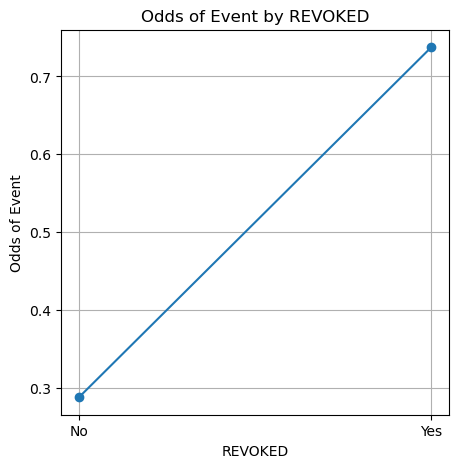

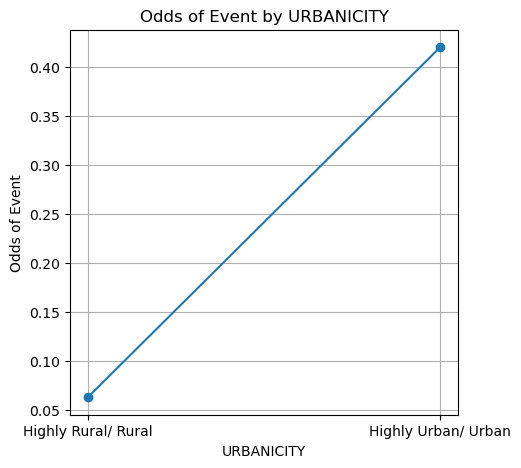

In [21]:
for var in cat_vars:
    var_dummies = pd.get_dummies(claims[var], prefix = var)
    
    var_odds = claims.groupby(var)['EVENT'].mean()
    
    var_odds = var_odds / (1 - var_odds)
    
    var_odds = var_odds.sort_index()
    
    # Plotting the odds for 'MSTATUS'
    plt.figure(figsize=(5, 5))
    plt.plot(var_odds.index, var_odds.values, marker='o')
    plt.title('Odds of Event by ' + var)
    plt.xlabel(var)
    plt.ylabel('Odds of Event')
    plt.grid(True)
    plt.show()

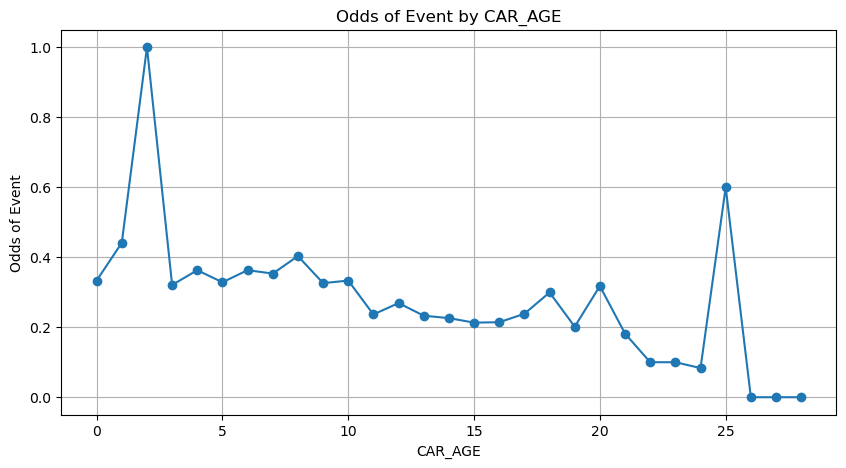

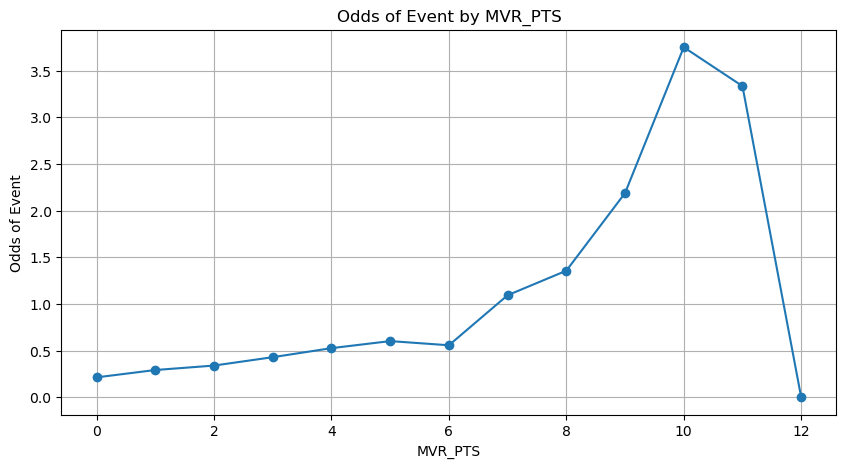

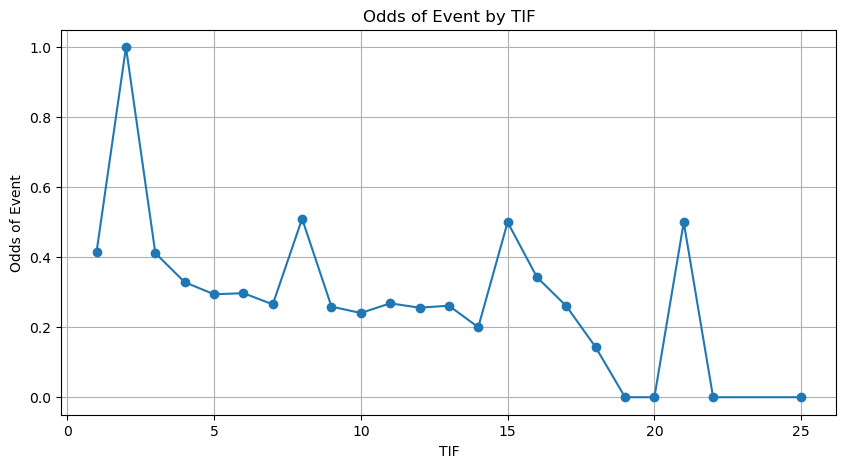

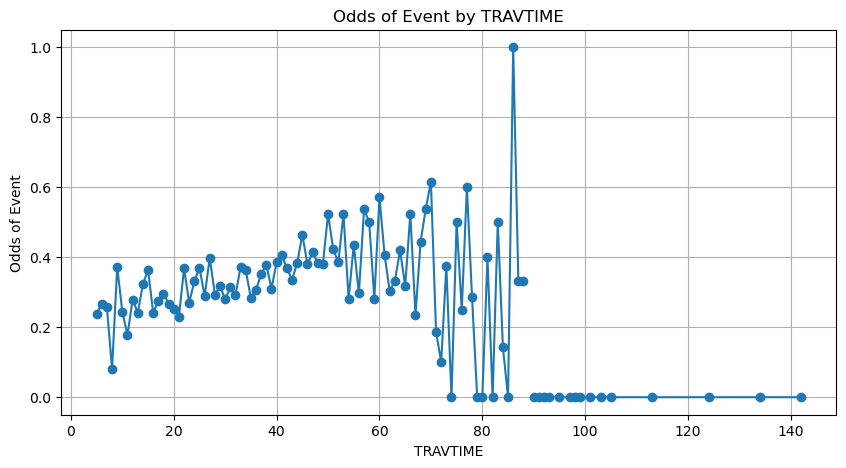

In [23]:
num_vars = ["CAR_AGE", "MVR_PTS", "TIF", "TRAVTIME"]

for var in num_vars:
    var_odds = claims.groupby(var)['EVENT'].mean()
    var_odds = var_odds / (1 - var_odds)
    var_odds = var_odds.sort_index()
    
    # Plotting the odds for each variable
    plt.figure(figsize=(10, 5))
    plt.plot(var_odds.index, var_odds.values, marker='o')
    plt.title('Odds of Event by ' + var)
    plt.xlabel(var)
    plt.ylabel('Odds of Event')
    plt.grid(True)
    plt.show()

#### B. Enter the predictors into your model using Forward Selection.
The Entry Threshold is 0.05. Please provide a detailed report of the Forward Selection. However, you do not need to show steps such as in the previous question.  The report should include (1) the predictor entered, (2) the log-likelihood value, (3) the Deviance Chi-squares statistic, (4) the Deviance Degree of Freedom, and (5) the Chi-square significance.

In [26]:
threshold = 0.05

# Initial null model
reduced_set = []
remaining_vars = ["CAR_AGE", "MVR_PTS", "TIF", "TRAVTIME", "MSTATUS", "CAR_TYPE", "REVOKED", "URBANICITY"]

# Forward Selection


CAR_AGE
MVR_PTS
TIF
TRAVTIME
MSTATUS
CAR_TYPE
REVOKED
URBANICITY


#### C. Which predictors does your final model contain?



#### D. Show table of complete set of parameters on final model.
Also include exponentiated estimates (i.e., apply the exp() function on the parameter estimates)

### 2. Visually assess final model in Question 1
Color-code the markers according to the Exposure value. Also, briefly comment on Graphs

#### A. Plot predicted Event probability versus the observed Frequency

#### B. Plot deviance residuals versus the observed Frequency

### 3. Calculate the Accuracy metric to assess final model
If predicted Event probability of an observation is greater than or equal to 0.25, then you will classify that observation as the Event (i.e., filing more than one claim per unit exposure). An observation is correctly classified if the predicted target value equals the observed target value. The Accuracy metric is the proportion of observations that are correctly classified.

### Bonus
For questions 1B, 1C and 1D apply recursive feature elimination (RFE) instead of forward selection)
(see: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html)